In [2]:
import pandas as pd
import seaborn as sns
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import flair
import warnings
warnings.filterwarnings('ignore')

sns.set(rc={'figure.figsize':(30,1)})
def visualise_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

In [3]:
sentence = "Geeks For Geeks is the best portal for the computer science engineering students."

In [4]:
sid_obj = SentimentIntensityAnalyzer() 

### Sentiment Analysis using NLTK

In [5]:
def VADER_sentiment_scores(sentence): 
    sentiment_dict = sid_obj.polarity_scores(sentence)   
    if sentiment_dict['compound'] >= 0.05 : 
        print("Positive",sentiment_dict['compound']) 
    elif sentiment_dict['compound'] <= - 0.05 : 
        print("Negative",sentiment_dict['compound']) 
    else : 
        print("Neutral",sentiment_dict['compound']) 
    return(sentiment_dict)

In [6]:
sentiment_dict = VADER_sentiment_scores(sentence) 


Positive 0.5267


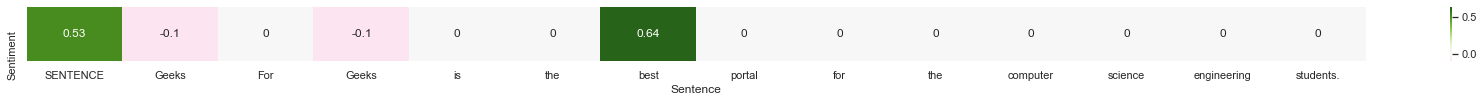

In [7]:
visualise_sentiments({
    "Sentence":["SENTENCE"] + sentence.split(),
    "Sentiment":[sid_obj.polarity_scores(sentence)["compound"]] + [sid_obj.polarity_scores(word)["compound"] for word in sentence.split()]
})

### Sentiment Analysis using TextBlob

In [8]:
def TextBlob_sentiment_scores(sentence): 
    TB = TextBlob(sentence).sentiment   
    if blob.sentiment.polarity  > 0.5 : 
        print("Positive",TB['compound']) 
  
    elif blob.sentiment.polarity < 0.5 : 
        print("Negative",TB['compound']) 
    else : 
        print("Neutral",TB['compound']) 

In [9]:
TB = TextBlob(sentence).sentiment
TB

Sentiment(polarity=1.0, subjectivity=0.3)

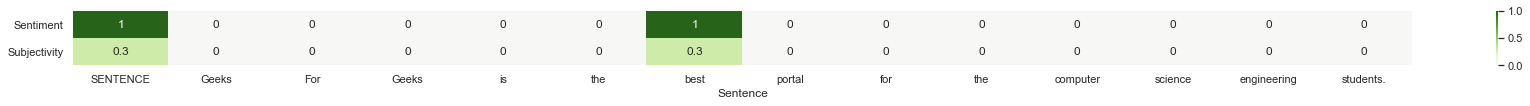

In [10]:
visualise_sentiments({
      "Sentence":["SENTENCE"] + sentence.split(),
      "Sentiment":[TextBlob(sentence).polarity] + [TextBlob(word).polarity for word in sentence.split()],
      "Subjectivity":[TextBlob(sentence).subjectivity] + [TextBlob(word).subjectivity for word in sentence.split()],
})

### Sentiment Analysis using FLAIR

In [11]:
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')
s = flair.data.Sentence(sentence)
flair_sentiment.predict(s)
total_sentiment = s.labels
total_sentiment

2020-08-04 14:18:55,165 loading file C:\Users\hongh\.flair\models\sentiment-en-mix-distillbert.pt


[POSITIVE (0.9608)]

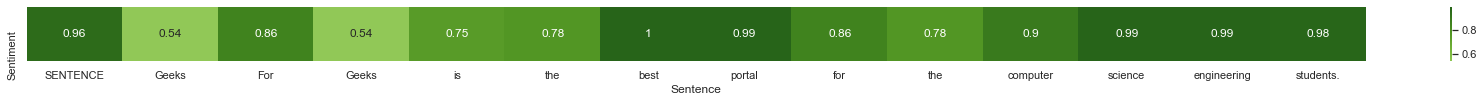

In [12]:
tokens = [token.text for token in s.tokens]
ss = [flair.data.Sentence(s) for s in tokens]
[flair_sentiment.predict(s) for s in ss]
sentiments = [s.labels[0].score * (-1,1)[str(s.labels[0]).split()[0].startswith("POS")] for s in ss]

visualise_sentiments({
      "Sentence":["SENTENCE"] + tokens,
      "Sentiment":[total_sentiment[0].score *(-1,1)[str(total_sentiment[0]).split()[0].startswith("POS")]] + sentiments,
})

### Display the Final result

In [13]:
# Result displayed from NLTK sentiment analysis
import emoji
prediction = total_sentiment
if sentiment_dict['compound'] >= 0.05 :
    emo = emoji.emojize(':smiley:', use_aliases=True)
    label = 'positive'
elif sentiment_dict['compound'] <= - 0.05 : 
    emo = emoji.emojize(':rage:', use_aliases=True)
    label = 'negative'
else: 
    emo = emoji.emojize(':rage:', use_aliases=True)
    label = 'neutral'
print (label, emo)

positive 😃
